In [1]:
import random
from typing import Optional

# from sqlalchemy import create_engine
# from sqlalchemy.orm import Session
from tqdm import tqdm

from arcworld.dsl.arc_types import Shapes
from arcworld.internal.constants import Example, Task
from arcworld.schematas.oop.expansion.transforms import DotsExpansion
from arcworld.shape.dsl.generator import ShapeGeneratorDSL
from arcworld.storage.fingerprint import hash_task, normalize_task
from arcworld.storage.table import Base, Schemata

AUTHOR = "kevinlo@student.ethz.ch"


class Expansion(Schemata):
    __tablename__ = "expansion"


def generate(N_tasks: int, N_examples: int, seed: Optional[int] = None):  # noqa
    if seed:
        print(f"Seed: {seed}")

    random.seed(seed)

    generator = ShapeGeneratorDSL(max_variations=30, max_obj_dimension=3)
    shapes: Shapes = generator.generate_random_shapes()
    print("Total number of generated shapes: ", len(shapes))

    for _ in tqdm(range(N_tasks), desc="Generating tasks"):
        transform = DotsExpansion()

        filtered_shapes = shapes
        for filter in transform.filters:
            filtered_shapes = filter.filter(filtered_shapes)

        sampler = transform.grid_sampler()

        task: Task = []
        try:
            for _ in range(N_examples):
                grid_builder = sampler()
                input_grid = grid_builder.build_input_grid(filtered_shapes)
                ouput_grid = transform.transform(input_grid)

                example = Example(input=input_grid.grid_np, output=ouput_grid.grid_np)

                task.append(example)
        except Exception as e:
            print(e)
        else:
            yield task, transform.program


engine = create_engine("sqlite:////Users/kev/tasks.db", echo=False)

N = 10
succesful = 0
seed = 13
store = False

with Session(engine) as session:
    if store:
        Base.metadata.create_all(engine)

    for task, program in generate(N, 4, seed):
        if store:
            session.add(
                Expansion(
                    id=hash_task(task),
                    author=AUTHOR,
                    transformation=program,
                    task=normalize_task(task),
                )
            )
            session.commit()
        succesful += 1

print(f"Succesfull ratio {succesful}/{N}")

c:\Users\test\anaconda3\envs\arcworld_kevin\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'create_engine' is not defined

In [ ]:
with Session(engine) as session:
    if store:
        Base.metadata.create_all(engine)

    for task, program in generate(N, 4, seed):
        if store:
                Expansion(
                    id=hash_task(task),
                    author=AUTHOR,
                    transformation=program,
                    task=normalize_task(task),
                )
            session.commit()
        succesful += 1

print(f"Succesfull ratio {succesful}/{N}")

In [19]:
x = []
for task, program in generate(3, 4, seed = 1):
    x.append(Expansion(id=hash_task(task),
                    author=AUTHOR,
                    transformation=program,
                    task=normalize_task(task),))

Seed: 1


Augmenting shapes: 100%|██████████| 1593/1593 [00:01<00:00, 1039.18it/s]


Total number of generated shapes:  156


Generating tasks: 100%|██████████| 3/3 [00:00<00:00, 28.93it/s]


In [25]:
import numpy as np
def from_grid_list_to_dict(grid_list__):
    returned_grid_list = []
    for i in range(4):
        input_grid = np.array(grid_list__[i][0][0:20, 0:20])
        output_grid = np.array(grid_list__[i][1][0:20, 0:20])
        for i in range(20):
            for j in range(20):
                if input_grid[i,j] == 9:
                    input_grid[i,j] = 0
                if output_grid[i,j] == 9:
                    output_grid[i,j] = 0
        returned_grid_list.append({'input': input_grid, 'output': output_grid})
    return returned_grid_list

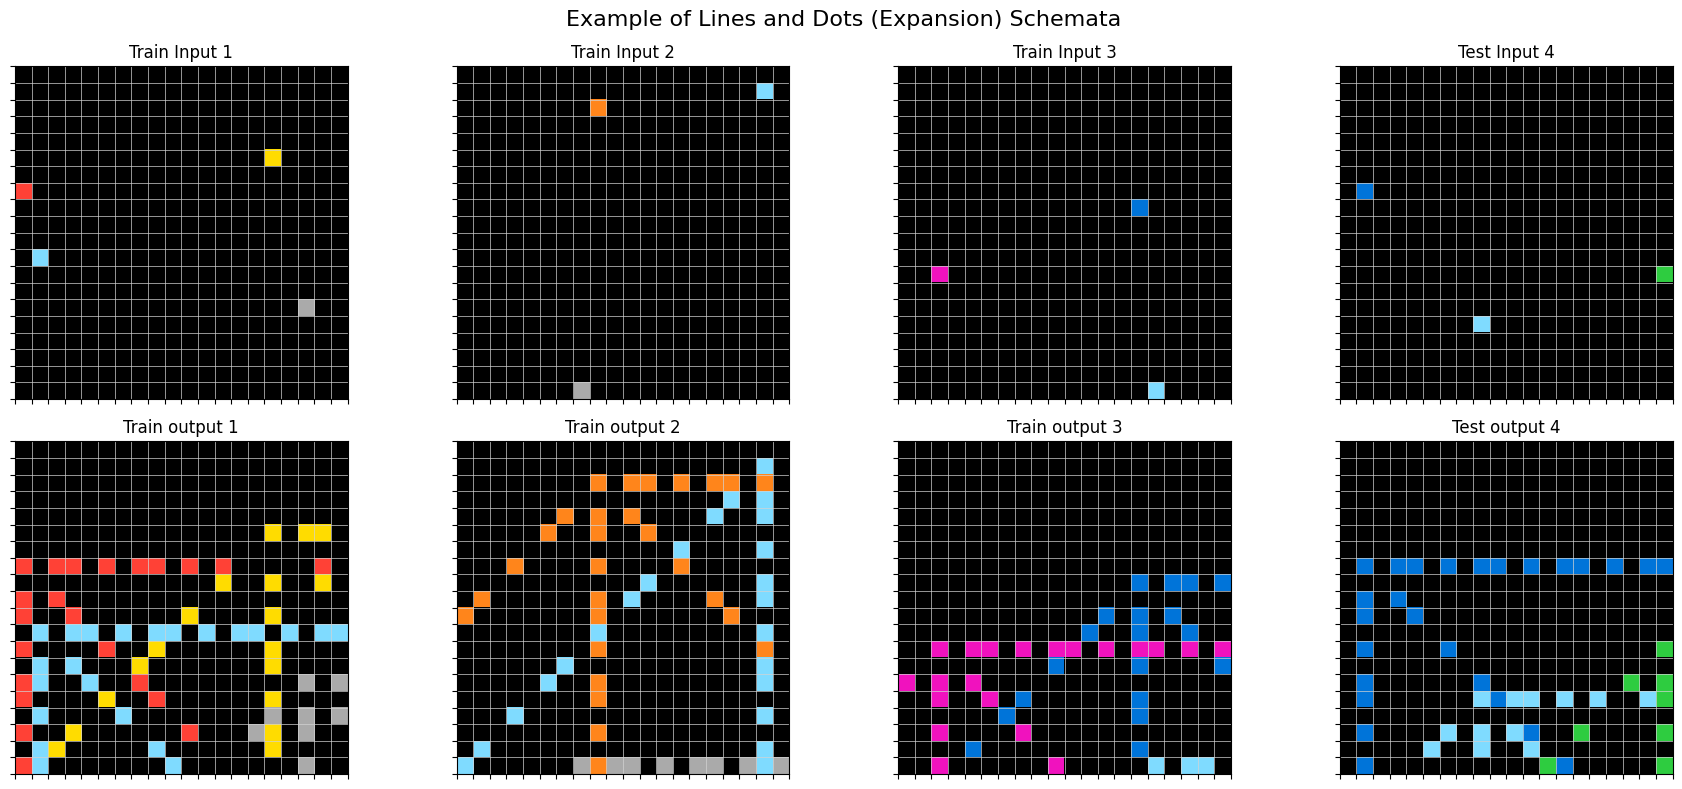

In [27]:
import sys
sys.path.append('../../../../ARC_Challenge/')
from ARC_World.general_utils import plot_grid, plot_task
plotable = from_grid_list_to_dict(x[2].task)

plot_task(plotable, task_config={}, suptitle = 'Example of Lines and Dots (Expansion) Schemata')

In [24]:
plotable

[{'input': array([[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9